In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read in data.

In [2]:
wego = pd.read_csv("../data/Headway Data, 8-1-2023 to 9-30-2023.csv")


In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
wego.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 04:42:00,2023-08-01 04:37:38,2023-08-01 04:44:08,-2.133333,NaN,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 04:46:00,2023-08-01 04:48:27,2023-08-01 04:48:27,-2.450000,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 04:54:00,2023-08-01 04:54:56,2023-08-01 04:54:56,-0.933333,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,2023-08-01 05:10:00,2023-08-01 05:03:43,2023-08-01 05:03:43,6.283333,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 05:15:00,2023-08-01 05:03:43,2023-08-01 05:16:35,-1.583333,NaN,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0


# Exploration

In [5]:
wego.columns

Index(['CALENDAR_ID', 'SERVICE_ABBR', 'ADHERENCE_ID', 'DATE', 'ROUTE_ABBR',
       'BLOCK_ABBR', 'OPERATOR', 'TRIP_ID', 'OVERLOAD_ID',
       'ROUTE_DIRECTION_NAME', 'TIME_POINT_ABBR', 'ROUTE_STOP_SEQUENCE',
       'TRIP_EDGE', 'LATITUDE', 'LONGITUDE', 'SCHEDULED_TIME',
       'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
       'SCHEDULED_HDWY', 'ACTUAL_HDWY', 'HDWY_DEV', 'ADJUSTED_EARLY_COUNT',
       'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT', 'STOP_CANCELLED',
       'PREV_SCHED_STOP_CANCELLED', 'IS_RELIEF', 'DWELL_IN_MINS',
       'SCHEDULED_LAYOVER_MINUTES'],
      dtype='object')

In [6]:
wego.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350329 entries, 0 to 350328
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   CALENDAR_ID                350329 non-null  int64  
 1   SERVICE_ABBR               350329 non-null  int64  
 2   ADHERENCE_ID               350329 non-null  int64  
 3   DATE                       350329 non-null  object 
 4   ROUTE_ABBR                 350329 non-null  int64  
 5   BLOCK_ABBR                 350329 non-null  int64  
 6   OPERATOR                   350329 non-null  int64  
 7   TRIP_ID                    350329 non-null  int64  
 8   OVERLOAD_ID                350329 non-null  int64  
 9   ROUTE_DIRECTION_NAME       350329 non-null  object 
 10  TIME_POINT_ABBR            350329 non-null  object 
 11  ROUTE_STOP_SEQUENCE        350318 non-null  float64
 12  TRIP_EDGE                  350329 non-null  int64  
 13  LATITUDE                   35

In the data, the bus route can be identified by its ROUTE_ABBR value.  
3: West End  
7: Hillsboro  
22: Bordeaux  
23: Dickerson Pike  
50: Charlotte Pike  
52: Nolensville Pike  
55: Murfreesboro Pike  
56: Gallatin Pike  

In [7]:
wego['ROUTE_ABBR'].value_counts().sort_index()

ROUTE_ABBR
3     47162
7     18026
22    25959
23    42108
50    43291
52    51819
55    61944
56    60020
Name: count, dtype: int64

In [8]:
wego['SERVICE_ABBR'].value_counts().sort_index()

SERVICE_ABBR
1    279300
2     37497
3     33532
Name: count, dtype: int64

In [9]:
#wego['HDWY_DEV']

In [10]:
wego['ADHERENCE'].count()

338861

In [11]:
wego['ADHERENCE'].max()

88.383333

In [12]:
wego['ADHERENCE'].mean()

-3.1887964314276354

In [13]:
wego['ADHERENCE'].nsmallest(75)

103162   -948.533333
19788    -675.000000
340625   -618.166666
30377    -542.233333
229460   -539.933333
106535   -489.316666
133942   -480.900000
326620   -480.866666
229519   -466.366666
269889   -400.533333
120932   -379.550000
308795   -375.233333
22974    -373.466666
68208    -366.933333
229708   -340.966666
212919   -330.166666
224905   -322.783333
265400   -295.466666
19876    -283.866666
3231     -241.700000
129861   -219.900000
20536    -194.000000
333130   -166.566666
209473   -149.816666
209474   -144.333333
209475   -141.183333
209477   -140.066666
209478   -140.050000
326622   -139.683333
209476   -138.800000
209479   -137.033333
155177   -134.100000
3250     -133.950000
21295    -133.250000
3249     -133.133333
53134    -132.883333
3251     -132.200000
3248     -132.033333
21296    -131.900000
330228   -128.550000
21297    -128.416666
330229   -128.100000
329793   -126.966666
257235   -126.516666
257232   -126.466666
3246     -126.300000
256791   -126.216666
329794   -125

<Axes: ylabel='ADHERENCE'>

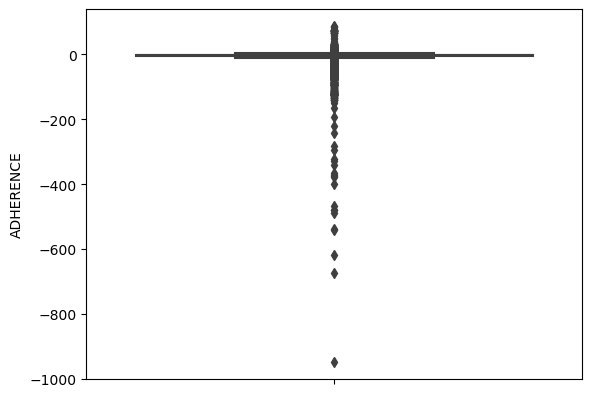

In [14]:
sns.boxplot(y="ADHERENCE",
                data=wego)

According to boxplot of adherence, most outliers are of the buses running late.

<Axes: ylabel='HDWY_DEV'>

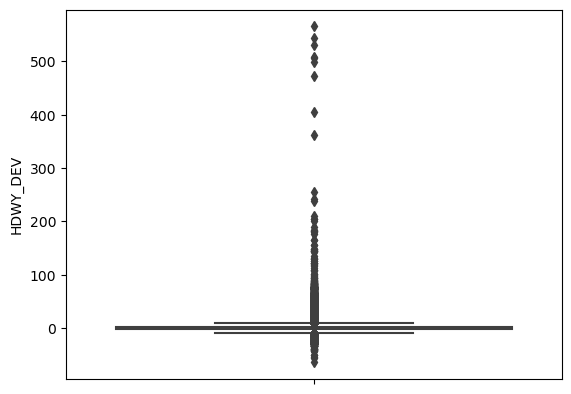

In [15]:
sns.boxplot(y='HDWY_DEV',
                data=wego)

According to boxplot of HDWY_DEV, most outliers are of 

Look at percentages of on time vs dataset.

In [16]:
wego['ADJUSTED_ONTIME_COUNT'].sum() / wego.shape[0]

0.7708411236295025

In [17]:
# Percent of on-time stops - using only tagged rows
round((wego['ADJUSTED_ONTIME_COUNT'].sum()) / (wego['ADJUSTED_ONTIME_COUNT'].sum() 
                                               + wego['ADJUSTED_EARLY_COUNT'].sum() 
                                               + wego['ADJUSTED_LATE_COUNT'].sum()) * 100, 2)

79.69

Look at percentages of early vs dataset.

In [18]:
wego['ADJUSTED_EARLY_COUNT'].sum() / wego.shape[0]

0.027902343225939045

In [19]:
# Percent of early - using only tagged rows
round((wego['ADJUSTED_EARLY_COUNT'].sum()) / (wego['ADJUSTED_ONTIME_COUNT'].sum() 
                                               + wego['ADJUSTED_EARLY_COUNT'].sum() 
                                               + wego['ADJUSTED_LATE_COUNT'].sum()) * 100, 2)

2.88

Look at percentages of late vs dataset.

In [20]:
wego['ADJUSTED_LATE_COUNT'].sum() / wego.shape[0]

0.16852158970567666

In [21]:
# Percent of late - using only tagged rows
round((wego['ADJUSTED_LATE_COUNT'].sum()) / (wego['ADJUSTED_ONTIME_COUNT'].sum() 
                                               + wego['ADJUSTED_EARLY_COUNT'].sum() 
                                               + wego['ADJUSTED_LATE_COUNT'].sum()) * 100, 2)

17.42

In [22]:
#Difference in percent toals when excluding NaN values for Late, Early, and On time counts.
print(77.08 + 2.79 + 16.85)
print(79.69 + 2.88 + 17.42)
print("Correct answer is 99.99")

96.72
99.99
Correct answer is 99.99


In [23]:
#find rows that do not have a value for adjusted on time, early, or late count.
zero_counts = wego[(wego['ADJUSTED_ONTIME_COUNT']==0) & (wego['ADJUSTED_EARLY_COUNT']==0) & (wego['ADJUSTED_LATE_COUNT']==0)]

In [24]:
zero_counts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11468 entries, 39 to 350321
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CALENDAR_ID                11468 non-null  int64  
 1   SERVICE_ABBR               11468 non-null  int64  
 2   ADHERENCE_ID               11468 non-null  int64  
 3   DATE                       11468 non-null  object 
 4   ROUTE_ABBR                 11468 non-null  int64  
 5   BLOCK_ABBR                 11468 non-null  int64  
 6   OPERATOR                   11468 non-null  int64  
 7   TRIP_ID                    11468 non-null  int64  
 8   OVERLOAD_ID                11468 non-null  int64  
 9   ROUTE_DIRECTION_NAME       11468 non-null  object 
 10  TIME_POINT_ABBR            11468 non-null  object 
 11  ROUTE_STOP_SEQUENCE        11462 non-null  float64
 12  TRIP_EDGE                  11468 non-null  int64  
 13  LATITUDE                   11468 non-null  float6

In [25]:
wego[['ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT']].value_counts().reset_index()

,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,count
0,0,0,1,270048
1,0,1,0,59038
2,0,0,0,11468
3,1,0,0,9775


In [26]:
zero_counts.tail()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
350249,120230930,2,100406533,2023-09-30,7,701,2531,353393,0,FROM DOWNTOWN,21BK,4.0,0,36.138881,-86.800622,2023-09-30 23:29:00,NaN,NaN,NaN,30.0,NaN,NaN,0,0,0,0,0.0,0,NaN,NaN
350295,120230930,2,100406581,2023-09-30,7,702,2312,353438,0,TO DOWNTOWN,MCC5_9,3.0,2,36.167091,-86.781923,2023-09-30 16:03:00,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,0,NaN,NaN
350313,120230930,2,100406599,2023-09-30,7,702,2312,353444,0,TO DOWNTOWN,MCC5_9,3.0,2,36.167091,-86.781923,2023-09-30 20:33:00,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,0,NaN,NaN
350319,120230930,2,100406605,2023-09-30,7,702,2312,353446,0,TO DOWNTOWN,MCC5_9,3.0,2,36.167091,-86.781923,2023-09-30 21:38:00,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,0,NaN,NaN
350321,120230930,2,100406607,2023-09-30,7,702,2312,353447,0,FROM DOWNTOWN,21BK,4.0,0,36.138881,-86.800622,2023-09-30 21:59:00,NaN,NaN,NaN,30.0,NaN,NaN,0,0,0,0,0.0,0,NaN,NaN


In [27]:
zero_counts["IS_RELIEF"].sum()

133

In [28]:
zero_counts['STOP_CANCELLED'].sum()

2479

In [29]:
wego['IS_RELIEF'].sum()

4188

In [30]:
wego['STOP_CANCELLED'].sum()

5347

In [31]:
wego['PREV_SCHED_STOP_CANCELLED'].sum()

4254.0

In [32]:
wego.agg({'ADHERENCE': ['min','max','mean']})

,ADHERENCE
min,-948.533333
max,88.383333
mean,-3.188796


# Clean data 

In [33]:
wego[wego['PREV_SCHED_STOP_CANCELLED']>=1].sort_values('HDWY_DEV',ascending=False).head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
270201,120230917,3,100026077,2023-09-17,23,2313,2669,350602,0,TO DOWNTOWN,N1SP,3.0,0,36.175714,-86.774535,2023-09-17 17:06:00,2023-09-17 17:07:10,2023-09-17 17:07:10,-1.166666,25.0,568.833333,543.833333,0,0,1,0,1.0,0,0.0,NaN
187823,120230902,2,100388178,2023-09-02,23,2311,2221,350442,0,TO DOWNTOWN,N1SP,3.0,0,36.175714,-86.774535,2023-09-02 16:16:00,2023-09-02 16:16:02,2023-09-02 16:16:02,-0.033333,25.0,523.066666,498.066666,0,0,1,1,1.0,0,0.0,NaN
141314,120230825,1,100168684,2023-08-25,23,2310,3120,350355,0,FROM DOWNTOWN,EDBC,8.0,0,36.231512,-86.780490,2023-08-25 23:44:00,2023-08-27 00:12:48,2023-08-26 00:12:48,-28.800000,30.0,391.033333,361.033333,0,1,0,0,1.0,0,0.0,NaN
227462,120230909,2,100580899,2023-09-09,52,5212,2138,352236,1,FROM DOWNTOWN,HCKP,9.0,0,36.048934,-86.713854,2023-09-10 00:27:00,2023-09-12 00:35:35,2023-09-11 00:35:35,-8.583333,29.0,284.783333,255.783333,0,1,0,0,1.0,0,0.0,NaN
226,120230801,1,99458120,2023-08-01,22,2202,1190,345297,0,TO DOWNTOWN,YGKG,7.0,0,36.203239,-86.840636,2023-08-01 10:02:00,2023-08-01 10:03:38,2023-08-01 10:03:38,-1.633333,45.0,226.816666,181.816666,0,0,1,1,1.0,0,0.0,NaN


In [34]:
#removing rows where prev sched stop cancelled is marked.
wego = wego[wego['PREV_SCHED_STOP_CANCELLED']!=1]

In [35]:
#removing rows where SCHEDULED_HDWY = 0.00 which caused infinite values.
wego = wego[wego['SCHEDULED_HDWY']!=0.00]

df = df.loc[~((df['col1'] == 'A') & (df['col2'] > 6))]  
~ negates and keeps rows that don't meet the criteria.

In [36]:
#removing nan rows where ontime, early, and late counts are all = 0.
wego_clean = wego.loc[~((wego['ADJUSTED_ONTIME_COUNT']==0) & (wego['ADJUSTED_EARLY_COUNT']==0) & (wego['ADJUSTED_LATE_COUNT']==0))]

In [37]:
#getting clean adherence and hdwy_dev to use in percentile calculations.
adherence = wego_clean['ADHERENCE']
adherence_cleaned = adherence.dropna()
hdwy_dev = wego_clean['HDWY_DEV']
hdwy_dev_cleaned = hdwy_dev.dropna()

In [38]:
#find the 1st and 99th percentile of adherence.
adherence_1 = np.percentile(adherence_cleaned,0.1)
adherence_99 = np.percentile(adherence_cleaned,99.9)
print(adherence_1)
print(adherence_99)

-57.04575
9.463832695001242


In [39]:
#find the 1st and 99th percentile of hdwy_dev
hdwy_dev_1 = np.percentile(hdwy_dev_cleaned,0.1)
hdwy_dev_99 = np.percentile(hdwy_dev_cleaned,99.9)
print(hdwy_dev_1)
print(hdwy_dev_99)

-21.626300526
56.439450000000946


In [40]:
wego_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 335086 entries, 0 to 350328
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   CALENDAR_ID                335086 non-null  int64  
 1   SERVICE_ABBR               335086 non-null  int64  
 2   ADHERENCE_ID               335086 non-null  int64  
 3   DATE                       335086 non-null  object 
 4   ROUTE_ABBR                 335086 non-null  int64  
 5   BLOCK_ABBR                 335086 non-null  int64  
 6   OPERATOR                   335086 non-null  int64  
 7   TRIP_ID                    335086 non-null  int64  
 8   OVERLOAD_ID                335086 non-null  int64  
 9   ROUTE_DIRECTION_NAME       335086 non-null  object 
 10  TIME_POINT_ABBR            335086 non-null  object 
 11  ROUTE_STOP_SEQUENCE        335081 non-null  float64
 12  TRIP_EDGE                  335086 non-null  int64  
 13  LATITUDE                   335086 

Next need to remove values outside of the percentile ranges of adherence and hdwy.

In [41]:
wego_clean = wego_clean.drop(wego_clean[wego_clean.ADHERENCE < adherence_1].index)
wego_clean = wego_clean.drop(wego_clean[wego_clean.ADHERENCE > adherence_99].index)
wego_clean = wego_clean.drop(wego_clean[wego_clean.HDWY_DEV < hdwy_dev_1].index)
wego_clean = wego_clean.drop(wego_clean[wego_clean.HDWY_DEV > hdwy_dev_99].index)

In [42]:
wego_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333924 entries, 0 to 350328
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   CALENDAR_ID                333924 non-null  int64  
 1   SERVICE_ABBR               333924 non-null  int64  
 2   ADHERENCE_ID               333924 non-null  int64  
 3   DATE                       333924 non-null  object 
 4   ROUTE_ABBR                 333924 non-null  int64  
 5   BLOCK_ABBR                 333924 non-null  int64  
 6   OPERATOR                   333924 non-null  int64  
 7   TRIP_ID                    333924 non-null  int64  
 8   OVERLOAD_ID                333924 non-null  int64  
 9   ROUTE_DIRECTION_NAME       333924 non-null  object 
 10  TIME_POINT_ABBR            333924 non-null  object 
 11  ROUTE_STOP_SEQUENCE        333919 non-null  float64
 12  TRIP_EDGE                  333924 non-null  int64  
 13  LATITUDE                   333924 

# Q1 What is the overall on-time performance, and what do the overall distributions of adherence and headway deviation look like? 

In [43]:
# Percent of on-time stops - using only tagged rows in clean data set
round((wego_clean['ADJUSTED_ONTIME_COUNT'].sum()) / (wego_clean['ADJUSTED_ONTIME_COUNT'].sum() 
                                               + wego_clean['ADJUSTED_EARLY_COUNT'].sum() 
                                               + wego_clean['ADJUSTED_LATE_COUNT'].sum()) * 100, 2)

79.9

In [128]:
(wego_clean
 ['ADJUSTED_ONTIME_COUNT']
 .mean()
)

0.7989812053042009

In [44]:
# Percent of early count - using only tagged rows in clean data set
round((wego_clean['ADJUSTED_EARLY_COUNT'].sum()) / (wego_clean['ADJUSTED_ONTIME_COUNT'].sum() 
                                               + wego_clean['ADJUSTED_EARLY_COUNT'].sum() 
                                               + wego_clean['ADJUSTED_LATE_COUNT'].sum()) * 100, 2)

2.83

In [45]:
# Percent of late count - using only tagged rows in clean data set
round((wego_clean['ADJUSTED_LATE_COUNT'].sum()) / (wego_clean['ADJUSTED_ONTIME_COUNT'].sum() 
                                               + wego_clean['ADJUSTED_EARLY_COUNT'].sum() 
                                               + wego_clean['ADJUSTED_LATE_COUNT'].sum()) * 100, 2)

17.27

On-time performance shows that the busses are on time 79.76% of the time.

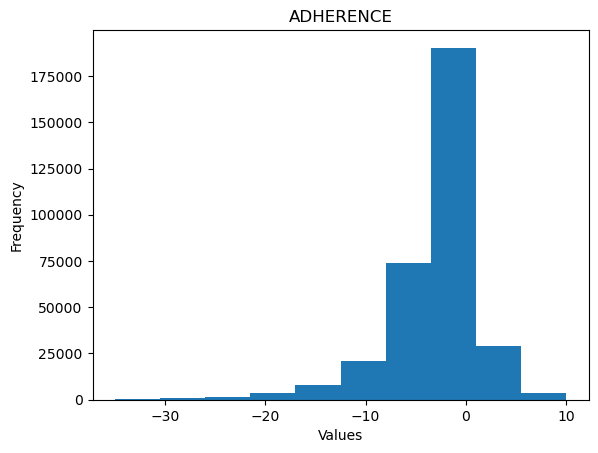

In [46]:
plt.hist(wego_clean["ADHERENCE"], bins=10, range=(-35,10) )
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("ADHERENCE")
plt.show()

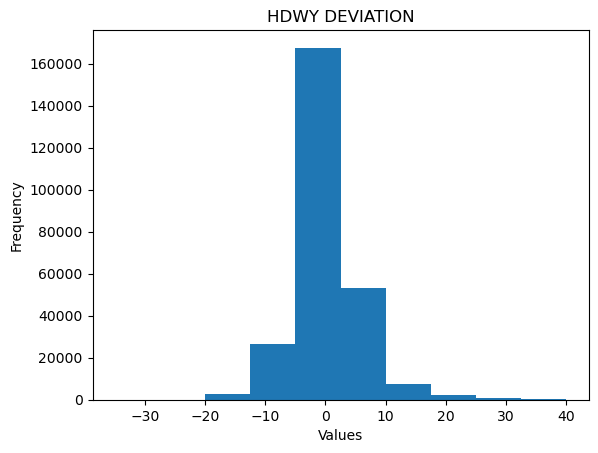

In [47]:
plt.hist(wego_clean["HDWY_DEV"], bins=10, range=(-35,40) )
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("HDWY DEVIATION")
plt.show()

# Create additional HDWY category columns: HDWY_DEV_Percentage, BUNCHING, GAPPING, NORMAL_HDWY

In [48]:
wego_clean['HDWY_DEV_PERCENTAGE'] = wego_clean['HDWY_DEV'] / wego_clean['SCHEDULED_HDWY'] *100

In [49]:
wego_clean['HDWY_DEV_PERCENTAGE'].min()

-100.0

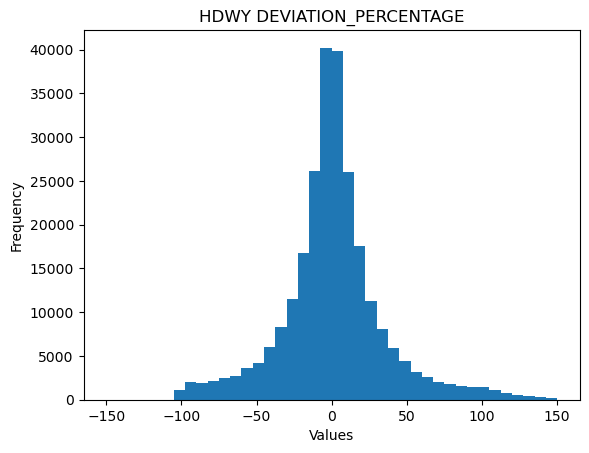

In [50]:
#checking to make sure deviation percentages make sense.
plt.hist(wego_clean["HDWY_DEV_PERCENTAGE"], bins=40, range=(-150,150) )
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("HDWY DEVIATION_PERCENTAGE")
plt.show()

In [51]:
wego_clean.head(100)

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,HDWY_DEV_PERCENTAGE
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 04:42:00,2023-08-01 04:37:38,2023-08-01 04:44:08,-2.133333,NaN,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 04:46:00,2023-08-01 04:48:27,2023-08-01 04:48:27,-2.450000,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 04:54:00,2023-08-01 04:54:56,2023-08-01 04:54:56,-0.933333,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,2023-08-01 05:10:00,2023-08-01 05:03:43,2023-08-01 05:03:43,6.283333,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 05:15:00,2023-08-01 05:03:43,2023-08-01 05:16:35,-1.583333,NaN,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0,NaN
5,120230801,1,99457895,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 05:25:00,2023-08-01 05:24:03,2023-08-01 05:24:03,0.950000,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,NaN
6,120230801,1,99457896,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,MHSP,14.0,2,36.181248,-86.847705,2023-08-01 05:32:00,2023-08-01 05:30:30,2023-08-01 05:30:30,1.500000,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN,NaN
7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0,37.666666,2.666666,0,0,1,0,0.0,0,13.216666,10.0,7.619046
8,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 05:46:00,2023-08-01 05:47:55,2023-08-01 05:47:55,-1.916666,35.0,36.966666,1.966666,0,0,1,0,0.0,0,0.000000,NaN,5.619046
9,120230801,1,99457899,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 05:54:00,2023-08-01 05:54:11,2023-08-01 05:54:11,-0.183333,15.0,14.516666,-0.483334,0,0,1,0,0.0,0,0.000000,NaN,-3.222227


In [52]:
#create BUNCHING column and set condition to 1 if less than -50
wego_clean['BUNCHING'] = np.where(wego_clean['HDWY_DEV_PERCENTAGE'] 
                       < -50, '1','0')

In [53]:
wego_clean['BUNCHING'].value_counts()

BUNCHING
0    316682
1     17242
Name: count, dtype: int64

In [54]:
#create GAPPING column and set condition to 1 if greater than 50
wego_clean['GAPPING'] = np.where(wego_clean['HDWY_DEV_PERCENTAGE'] 
                       > 50, '1','0')

In [55]:
wego_clean['GAPPING'].value_counts()

GAPPING
0    313362
1     20562
Name: count, dtype: int64

In [56]:
#create NORMAL_HDWY column and set condition to 1 if >= than -50 and <= 50.
wego_clean['NORMAL_HDWY'] = np.where((wego_clean['HDWY_DEV_PERCENTAGE'] 
                       >= -50)&(wego_clean['HDWY_DEV_PERCENTAGE'] 
                       <= 50), '1','0')

In [57]:
wego_clean['NORMAL_HDWY'].value_counts()

NORMAL_HDWY
1    223481
0    110443
Name: count, dtype: int64

In [58]:
wego_clean[['BUNCHING','GAPPING','NORMAL_HDWY']].value_counts().sort_values().reset_index()

,BUNCHING,GAPPING,NORMAL_HDWY,count
0,1,0,0,17242
1,0,1,0,20562
2,0,0,0,72639
3,0,0,1,223481


In [59]:
 wego_tripedge = wego_clean[wego_clean['TRIP_EDGE']>0]

In [60]:
wego_tripedge.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128822 entries, 0 to 350328
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   CALENDAR_ID                128822 non-null  int64  
 1   SERVICE_ABBR               128822 non-null  int64  
 2   ADHERENCE_ID               128822 non-null  int64  
 3   DATE                       128822 non-null  object 
 4   ROUTE_ABBR                 128822 non-null  int64  
 5   BLOCK_ABBR                 128822 non-null  int64  
 6   OPERATOR                   128822 non-null  int64  
 7   TRIP_ID                    128822 non-null  int64  
 8   OVERLOAD_ID                128822 non-null  int64  
 9   ROUTE_DIRECTION_NAME       128822 non-null  object 
 10  TIME_POINT_ABBR            128822 non-null  object 
 11  ROUTE_STOP_SEQUENCE        128817 non-null  float64
 12  TRIP_EDGE                  128822 non-null  int64  
 13  LATITUDE                   128822 

# Q2 How does direction of travel, route, or location affect the headway and on-time performance?

In [61]:
wego_clean.ROUTE_DIRECTION_NAME.value_counts()

ROUTE_DIRECTION_NAME
FROM DOWNTOWN    176991
TO DOWNTOWN      156933
Name: count, dtype: int64

In [62]:
#create from down town and to downtown 
wego_from_downtown = wego_clean[wego_clean['ROUTE_DIRECTION_NAME'] == 'FROM DOWNTOWN']
wego_to_downtown = wego_clean[wego_clean['ROUTE_DIRECTION_NAME'] == 'TO DOWNTOWN']

Look at histograms for to and from downtown.

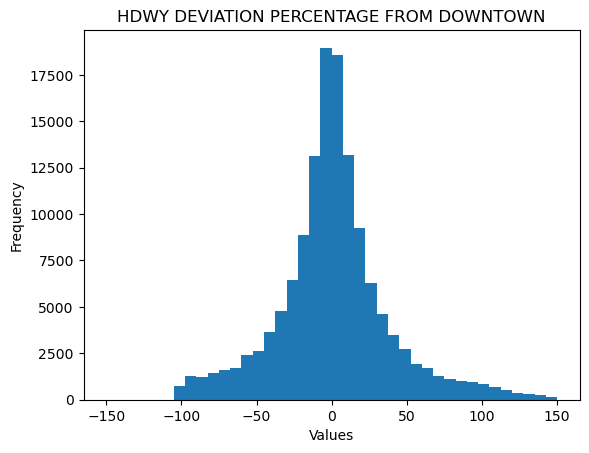

In [63]:
plt.hist(wego_from_downtown["HDWY_DEV_PERCENTAGE"], bins=40, range=(-150,150) )
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("HDWY DEVIATION PERCENTAGE FROM DOWNTOWN")
plt.show()

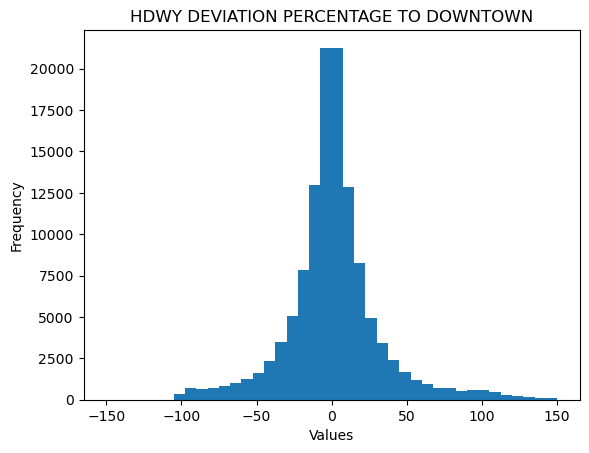

In [64]:
plt.hist(wego_to_downtown["HDWY_DEV_PERCENTAGE"], bins=40, range=(-150,150) )
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("HDWY DEVIATION PERCENTAGE TO DOWNTOWN")
plt.show()

In [65]:
wego_from_downtown.agg({'HDWY_DEV_PERCENTAGE': ['min','max','mean']})

,HDWY_DEV_PERCENTAGE
min,-100.00000
max,2417.50000
mean,3.03747


In [66]:
wego_to_downtown.agg({'HDWY_DEV_PERCENTAGE': ['min','max','mean']})

,HDWY_DEV_PERCENTAGE
min,-100.000000
max,551.388883
mean,2.029132


Look at percentages of ontime performance from and to downtown

In [67]:
# Percent of on-time stops from downtown.
print(round((wego_from_downtown['ADJUSTED_ONTIME_COUNT'].sum()) / (wego_from_downtown['ADJUSTED_ONTIME_COUNT'].sum() 
                                               + wego_from_downtown['ADJUSTED_EARLY_COUNT'].sum() 
                                               + wego_from_downtown['ADJUSTED_LATE_COUNT'].sum()) * 100, 2))
# Percent of early stops from downtown.
print(round((wego_from_downtown['ADJUSTED_EARLY_COUNT'].sum()) / (wego_from_downtown['ADJUSTED_ONTIME_COUNT'].sum() 
                                               + wego_from_downtown['ADJUSTED_EARLY_COUNT'].sum() 
                                               + wego_from_downtown['ADJUSTED_LATE_COUNT'].sum()) * 100, 2))
# Percent of late stops from downtown.
print(round((wego_from_downtown['ADJUSTED_LATE_COUNT'].sum()) / (wego_from_downtown['ADJUSTED_ONTIME_COUNT'].sum() 
                                               + wego_from_downtown['ADJUSTED_EARLY_COUNT'].sum() 
                                               + wego_from_downtown['ADJUSTED_LATE_COUNT'].sum()) * 100, 2))

75.22
2.89
21.89


In [68]:
# Percent of on-time stops from downtown.
print(round((wego_to_downtown['ADJUSTED_ONTIME_COUNT'].sum()) / (wego_to_downtown['ADJUSTED_ONTIME_COUNT'].sum() 
                                               + wego_to_downtown['ADJUSTED_EARLY_COUNT'].sum() 
                                               + wego_to_downtown['ADJUSTED_LATE_COUNT'].sum()) * 100, 2))
# Percent of early stops from downtown.
print(round((wego_to_downtown['ADJUSTED_EARLY_COUNT'].sum()) / (wego_to_downtown['ADJUSTED_ONTIME_COUNT'].sum() 
                                               + wego_to_downtown['ADJUSTED_EARLY_COUNT'].sum() 
                                               + wego_to_downtown['ADJUSTED_LATE_COUNT'].sum()) * 100, 2))
# Percent of late stops from downtown.
print(round((wego_to_downtown['ADJUSTED_LATE_COUNT'].sum()) / (wego_to_downtown['ADJUSTED_ONTIME_COUNT'].sum() 
                                               + wego_to_downtown['ADJUSTED_EARLY_COUNT'].sum() 
                                               + wego_to_downtown['ADJUSTED_LATE_COUNT'].sum()) * 100, 2))

85.17
2.76
12.07


In [69]:
wego_trip_direction = wego_clean[['ROUTE_DIRECTION_NAME','ADJUSTED_ONTIME_COUNT','ADJUSTED_EARLY_COUNT','ADJUSTED_LATE_COUNT']].value_counts().sort_values().reset_index()

In [70]:
wego_trip_direction

,ROUTE_DIRECTION_NAME,ADJUSTED_ONTIME_COUNT,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,count
0,TO DOWNTOWN,0,1,0,4329
1,FROM DOWNTOWN,0,1,0,5111
2,TO DOWNTOWN,0,0,1,18944
3,FROM DOWNTOWN,0,0,1,38741
4,FROM DOWNTOWN,1,0,0,133139
5,TO DOWNTOWN,1,0,0,133660


In [71]:
wego_clean.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,HDWY_DEV_PERCENTAGE,BUNCHING,GAPPING,NORMAL_HDWY
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 04:42:00,2023-08-01 04:37:38,2023-08-01 04:44:08,-2.133333,NaN,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN,NaN,0,0,0
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 04:46:00,2023-08-01 04:48:27,2023-08-01 04:48:27,-2.450000,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,NaN,0,0,0
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 04:54:00,2023-08-01 04:54:56,2023-08-01 04:54:56,-0.933333,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,NaN,0,0,0
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,2023-08-01 05:10:00,2023-08-01 05:03:43,2023-08-01 05:03:43,6.283333,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN,NaN,0,0,0
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 05:15:00,2023-08-01 05:03:43,2023-08-01 05:16:35,-1.583333,NaN,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0,NaN,0,0,0


In [72]:
wego_route_performance = wego_clean.groupby('ROUTE_ABBR')[['ADJUSTED_ONTIME_COUNT','ADJUSTED_EARLY_COUNT','ADJUSTED_LATE_COUNT']].value_counts().reset_index()

In [73]:
wego_route_performance

,ROUTE_ABBR,ADJUSTED_ONTIME_COUNT,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,count
0,3,1,0,0,34221
1,3,0,0,1,9438
2,3,0,1,0,1345
3,7,1,0,0,13261
4,7,0,0,1,3367
5,7,0,1,0,375
6,22,1,0,0,21308
7,22,0,0,1,1950
8,22,0,1,0,605
9,23,1,0,0,34725


In [74]:
for index,row in wego_route_performance.iterrows():
    print(row['ROUTE_ABBR'], row['count'])

3 34221
3 9438
3 1345
7 13261
7 3367
7 375
22 21308
22 1950
22 605
23 34725
23 3148
23 1235
50 36065
50 5020
50 1180
52 37403
52 9706
52 1491
55 41806
55 16394
55 1506
56 48010
56 8662
56 1703


In [75]:
round(wego_clean.groupby(by='ROUTE_ABBR').agg(HeadwayDeviation=('HDWY_DEV', 'mean'), Adherence=('ADHERENCE', 'mean')),2)

,HeadwayDeviation,Adherence
ROUTE_ABBR,,
3,0.54,-3.71
7,0.33,-3.48
22,0.57,-1.07
23,0.82,-1.64
50,0.17,-2.42
52,0.71,-3.73
55,0.19,-4.62
56,0.12,-2.65


In [123]:
#isolate routes
route3 = wego_clean[wego_clean['ROUTE_ABBR']==3]
route7 = wego_clean[wego_clean['ROUTE_ABBR']==7]
route22 = wego_clean[wego_clean['ROUTE_ABBR']==22]
route23 = wego_clean[wego_clean['ROUTE_ABBR']==23]
route50 = wego_clean[wego_clean['ROUTE_ABBR']==50]
route52 = wego_clean[wego_clean['ROUTE_ABBR']==52]
route55 = wego_clean[wego_clean['ROUTE_ABBR']==55]
route56 = wego_clean[wego_clean['ROUTE_ABBR']==56]

In [77]:
routes = wego_clean.ROUTE_ABBR.unique()

In [78]:
routes

array([22, 23,  3,  7, 50, 52, 55, 56], dtype=int64)

In [79]:
# Percent of on-time stops for route 3.
print(round((route3['ADJUSTED_ONTIME_COUNT'].sum()) / (route3['ADJUSTED_ONTIME_COUNT'].sum() 
                                               + route3['ADJUSTED_EARLY_COUNT'].sum() 
                                               + route3['ADJUSTED_LATE_COUNT'].sum()) * 100, 2))
# Percent of early stops for route 3.
print(round((route3['ADJUSTED_EARLY_COUNT'].sum()) / (route3['ADJUSTED_ONTIME_COUNT'].sum() 
                                               + route3['ADJUSTED_EARLY_COUNT'].sum() 
                                               + route3['ADJUSTED_LATE_COUNT'].sum()) * 100, 2))
# Percent of late stops for route 3.
print(round((route3['ADJUSTED_LATE_COUNT'].sum()) / (route3['ADJUSTED_ONTIME_COUNT'].sum() 
                                               + route3['ADJUSTED_EARLY_COUNT'].sum() 
                                               + route3['ADJUSTED_LATE_COUNT'].sum()) * 100, 2))

76.04
2.99
20.97


In [80]:
# Percent of on-time stops for route 7.
print(round((route7['ADJUSTED_ONTIME_COUNT'].sum()) / (route7['ADJUSTED_ONTIME_COUNT'].sum() 
                                               + route7['ADJUSTED_EARLY_COUNT'].sum() 
                                               + route7['ADJUSTED_LATE_COUNT'].sum()) * 100, 2))
# Percent of early stops for route 7.
print(round((route7['ADJUSTED_EARLY_COUNT'].sum()) / (route7['ADJUSTED_ONTIME_COUNT'].sum() 
                                               + route7['ADJUSTED_EARLY_COUNT'].sum() 
                                               + route7['ADJUSTED_LATE_COUNT'].sum()) * 100, 2))
# Percent of late stops for route 7.
print(round((route7['ADJUSTED_LATE_COUNT'].sum()) / (route7['ADJUSTED_ONTIME_COUNT'].sum() 
                                               + route7['ADJUSTED_EARLY_COUNT'].sum() 
                                               + route7['ADJUSTED_LATE_COUNT'].sum()) * 100, 2))

77.99
2.21
19.8


In [81]:
# Percent of on-time stops for route 22.
print(round((route22['ADJUSTED_ONTIME_COUNT'].sum()) / (route22['ADJUSTED_ONTIME_COUNT'].sum() 
                                               + route22['ADJUSTED_EARLY_COUNT'].sum() 
                                               + route22['ADJUSTED_LATE_COUNT'].sum()) * 100, 2))
# Percent of early stops for route 22.
print(round((route22['ADJUSTED_EARLY_COUNT'].sum()) / (route22['ADJUSTED_ONTIME_COUNT'].sum() 
                                               + route22['ADJUSTED_EARLY_COUNT'].sum() 
                                               + route22['ADJUSTED_LATE_COUNT'].sum()) * 100, 2))
# Percent of late stops for route 22.
print(round((route22['ADJUSTED_LATE_COUNT'].sum()) / (route22['ADJUSTED_ONTIME_COUNT'].sum() 
                                               + route22['ADJUSTED_EARLY_COUNT'].sum() 
                                               + route22['ADJUSTED_LATE_COUNT'].sum()) * 100, 2))

89.29
2.54
8.17


In [82]:
# Percent of on-time stops for route 23.
print(round((route23['ADJUSTED_ONTIME_COUNT'].sum()) / (route23['ADJUSTED_ONTIME_COUNT'].sum() 
                                               + route23['ADJUSTED_EARLY_COUNT'].sum() 
                                               + route23['ADJUSTED_LATE_COUNT'].sum()) * 100, 2))
# Percent of early stops for route 23.
print(round((route23['ADJUSTED_EARLY_COUNT'].sum()) / (route23['ADJUSTED_ONTIME_COUNT'].sum() 
                                               + route23['ADJUSTED_EARLY_COUNT'].sum() 
                                               + route23['ADJUSTED_LATE_COUNT'].sum()) * 100, 2))
# Percent of late stops for route 23.
print(round((route23['ADJUSTED_LATE_COUNT'].sum()) / (route23['ADJUSTED_ONTIME_COUNT'].sum() 
                                               + route23['ADJUSTED_EARLY_COUNT'].sum() 
                                               + route23['ADJUSTED_LATE_COUNT'].sum()) * 100, 2))

88.79
3.16
8.05


In [83]:
# Percent of on-time stops for route 50.
print(round((route50['ADJUSTED_ONTIME_COUNT'].sum()) / (route50['ADJUSTED_ONTIME_COUNT'].sum() 
                                               + route50['ADJUSTED_EARLY_COUNT'].sum() 
                                               + route50['ADJUSTED_LATE_COUNT'].sum()) * 100, 2))
# Percent of early stops for route 50.
print(round((route50['ADJUSTED_EARLY_COUNT'].sum()) / (route50['ADJUSTED_ONTIME_COUNT'].sum() 
                                               + route50['ADJUSTED_EARLY_COUNT'].sum() 
                                               + route50['ADJUSTED_LATE_COUNT'].sum()) * 100, 2))
# Percent of late stops for route 50.
print(round((route50['ADJUSTED_LATE_COUNT'].sum()) / (route50['ADJUSTED_ONTIME_COUNT'].sum() 
                                               + route50['ADJUSTED_EARLY_COUNT'].sum() 
                                               + route50['ADJUSTED_LATE_COUNT'].sum()) * 100, 2))

85.33
2.79
11.88


In [84]:
# Percent of on-time stops for route 52.
print(round((route52['ADJUSTED_ONTIME_COUNT'].sum()) / (route52['ADJUSTED_ONTIME_COUNT'].sum() 
                                               + route52['ADJUSTED_EARLY_COUNT'].sum() 
                                               + route52['ADJUSTED_LATE_COUNT'].sum()) * 100, 2))
# Percent of early stops for route 52.
print(round((route52['ADJUSTED_EARLY_COUNT'].sum()) / (route52['ADJUSTED_ONTIME_COUNT'].sum() 
                                               + route52['ADJUSTED_EARLY_COUNT'].sum() 
                                               + route52['ADJUSTED_LATE_COUNT'].sum()) * 100, 2))
# Percent of late stops for route 52.
print(round((route52['ADJUSTED_LATE_COUNT'].sum()) / (route52['ADJUSTED_ONTIME_COUNT'].sum() 
                                               + route52['ADJUSTED_EARLY_COUNT'].sum() 
                                               + route52['ADJUSTED_LATE_COUNT'].sum()) * 100, 2))

76.96
3.07
19.97


In [85]:
# Percent of on-time stops for route 55.
print(round((route55['ADJUSTED_ONTIME_COUNT'].sum()) / (route55['ADJUSTED_ONTIME_COUNT'].sum() 
                                               + route55['ADJUSTED_EARLY_COUNT'].sum() 
                                               + route55['ADJUSTED_LATE_COUNT'].sum()) * 100, 2))
# Percent of early stops for route 55.
print(round((route55['ADJUSTED_EARLY_COUNT'].sum()) / (route55['ADJUSTED_ONTIME_COUNT'].sum() 
                                               + route55['ADJUSTED_EARLY_COUNT'].sum() 
                                               + route55['ADJUSTED_LATE_COUNT'].sum()) * 100, 2))
# Percent of late stops for route 55.
print(round((route55['ADJUSTED_LATE_COUNT'].sum()) / (route55['ADJUSTED_ONTIME_COUNT'].sum() 
                                               + route55['ADJUSTED_EARLY_COUNT'].sum() 
                                               + route55['ADJUSTED_LATE_COUNT'].sum()) * 100, 2))

70.02
2.52
27.46


In [86]:
# Percent of on-time stops for route 56.
print(round((route56['ADJUSTED_ONTIME_COUNT'].sum()) / (route56['ADJUSTED_ONTIME_COUNT'].sum() 
                                               + route56['ADJUSTED_EARLY_COUNT'].sum() 
                                               + route56['ADJUSTED_LATE_COUNT'].sum()) * 100, 2))
# Percent of early stops for route 56.
print(round((route56['ADJUSTED_EARLY_COUNT'].sum()) / (route56['ADJUSTED_ONTIME_COUNT'].sum() 
                                               + route56['ADJUSTED_EARLY_COUNT'].sum() 
                                               + route56['ADJUSTED_LATE_COUNT'].sum()) * 100, 2))
# Percent of late stops for route 56.
print(round((route56['ADJUSTED_LATE_COUNT'].sum()) / (route56['ADJUSTED_ONTIME_COUNT'].sum() 
                                               + route56['ADJUSTED_EARLY_COUNT'].sum() 
                                               + route56['ADJUSTED_LATE_COUNT'].sum()) * 100, 2))

82.24
2.92
14.84


Route 22 had the highest ontime performance.

# Q3 How does time of day or day of week affect headway and on-time performance?

Convert SCHEDULED_TIME to datetime format.

In [92]:
wego_clean['DATE_TIME'] = pd.to_datetime(wego_clean['SCHEDULED_TIME'])

Add columns for month, day, hour, day_name.

In [103]:
wego_clean['MONTH'] = wego_clean['DATE_TIME'].dt.month
wego_clean['DAY'] = wego_clean['DATE_TIME'].dt.day
wego_clean['HOUR'] = wego_clean['DATE_TIME'].dt.hour
wego_clean['DAY_NAME'] = wego_clean['DATE_TIME'].dt.day_name()

In [104]:
wego_clean.tail()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,HDWY_DEV_PERCENTAGE,BUNCHING,GAPPING,NORMAL_HDWY,DATE_TIME,MONTH,DAY,HOUR,DAY_NAME
350324,120230930,2,100406610,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-09-30 22:23:00,2023-09-30 22:31:26,2023-09-30 22:31:26,-8.433333,30.0,35.266666,5.266666,0,1,0,0,0.0,0,0.000000,NaN,17.555553,0,0,1,2023-09-30 22:23:00,9,30,22,Saturday
350325,120230930,2,100406611,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,MCC5_9,3.0,2,36.167091,-86.781923,2023-09-30 22:38:00,2023-09-30 22:49:18,2023-09-30 22:49:18,-11.300000,NaN,NaN,NaN,0,1,0,0,NaN,0,0.000000,NaN,NaN,0,0,0,2023-09-30 22:38:00,9,30,22,Saturday
350326,120230930,2,100406612,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 22:45:00,2023-09-30 22:49:19,2023-09-30 22:49:19,-4.316666,30.0,31.866666,1.866666,0,0,1,0,0.0,0,0.000000,NaN,6.222220,0,0,1,2023-09-30 22:45:00,9,30,22,Saturday
350327,120230930,2,100406613,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,21BK,4.0,0,36.138881,-86.800622,2023-09-30 22:59:00,2023-09-30 23:21:05,2023-09-30 23:21:05,-22.083333,30.0,47.500000,17.500000,0,1,0,0,0.0,0,0.000000,NaN,58.333333,0,1,0,2023-09-30 22:59:00,9,30,22,Saturday
350328,120230930,2,100406614,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,HBHS,5.0,2,36.107575,-86.812719,2023-09-30 23:11:00,2023-09-30 23:31:27,2023-09-30 23:34:40,-23.666666,NaN,NaN,NaN,0,1,0,0,NaN,0,3.216666,NaN,NaN,0,0,0,2023-09-30 23:11:00,9,30,23,Saturday


In [113]:
(wego_clean
 .groupby('DAY_NAME')
 ['HDWY_DEV_PERCENTAGE']
 .agg(['mean', 'std', 'median','max'])
)

,mean,std,median,max
DAY_NAME,,,,
Friday,3.526929,46.643653,0.500000,1440.833300
Monday,1.663972,39.290245,0.111110,1721.666650
Saturday,1.832956,28.453835,0.307016,325.555553
Sunday,2.475306,26.762663,0.166667,282.000000
Thursday,3.190669,49.011425,0.029821,2236.666650
Tuesday,2.414510,44.743973,0.000000,2135.000000
Wednesday,2.423445,48.650045,0.031445,2417.500000


In [114]:
(wego_clean
 .groupby('HOUR')
 ['HDWY_DEV_PERCENTAGE']
 .agg(['mean', 'std', 'median','max'])
)

,mean,std,median,max
HOUR,,,,
0,1.822071,27.733406,-0.277780,178.944443
1,-1.587303,57.893446,-20.333333,97.277777
4,-2.808297,8.565319,-1.733336,42.266664
5,2.514786,24.753047,1.095719,259.404757
6,2.797072,34.156706,0.500000,377.333320
7,4.702918,40.889441,0.972217,512.333320
8,0.927301,41.761074,-0.555558,289.666660
9,0.783144,36.096163,-0.388890,445.500000
10,1.301882,33.742019,-0.222227,259.722217


<Axes: xlabel='HOUR', ylabel='ADJUSTED_ONTIME_COUNT'>

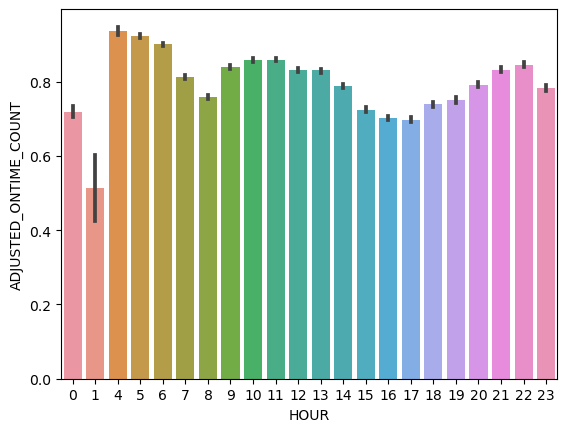

In [115]:
sns.barplot(wego_clean, x='HOUR', y='ADJUSTED_ONTIME_COUNT')

<Axes: xlabel='DAY_NAME', ylabel='ADJUSTED_ONTIME_COUNT'>

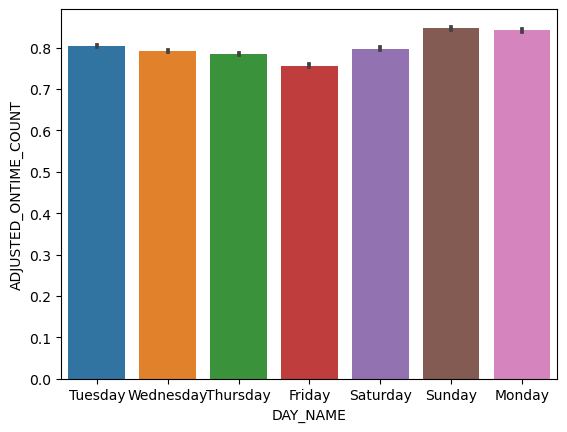

In [116]:
sns.barplot(wego_clean, x='DAY_NAME', y='ADJUSTED_ONTIME_COUNT')

In [135]:
#Percentage of on time by day
(wego_clean
 .groupby('DAY_NAME')
 ['ADJUSTED_ONTIME_COUNT']
 .agg(['mean']).sort_values('mean')
)

,mean
DAY_NAME,
Friday,0.756604
Thursday,0.784857
Wednesday,0.791478
Saturday,0.797629
Tuesday,0.803493
Monday,0.841206
Sunday,0.846369


In [133]:
#Percentage of on time by route.
(wego_clean
 .groupby('ROUTE_ABBR')
 ['ADJUSTED_ONTIME_COUNT']
 .().sort_values()
)

ROUTE_ABBR
55    0.700198
3     0.760399
52    0.769609
7     0.779921
56    0.822441
50    0.853307
23    0.887926
22    0.892930
Name: ADJUSTED_ONTIME_COUNT, dtype: float64

In [137]:
#Percentage of on time by hour.
(wego_clean
 .groupby('HOUR')
 ['ADJUSTED_ONTIME_COUNT']
 .mean().sort_values()
)

HOUR
1     0.513514
17    0.697740
16    0.702222
0     0.718494
15    0.724335
18    0.738546
19    0.751259
8     0.758470
23    0.782333
14    0.787897
20    0.792086
7     0.812881
13    0.830175
12    0.830587
21    0.832581
9     0.839944
22    0.845590
10    0.858531
11    0.859309
6     0.900309
5     0.923647
4     0.936574
Name: ADJUSTED_ONTIME_COUNT, dtype: float64

In [144]:
wego_clean.groupby('DAY_NAME')[['BUNCHING','GAPPING','NORMAL_HDWY']].value_counts()

DAY_NAME   BUNCHING  GAPPING  NORMAL_HDWY
Friday     0         0        1              34648
                              0              11927
                     1        0               4553
           1         0        0               3877
Monday     0         0        1              32260
                              0              10076
                     1        0               2392
           1         0        0               2163
Saturday   0         0        1              25634
                              0               7934
                     1        0               1238
           1         0        0                871
Sunday     0         0        1              20760
                              0               6441
                     1        0                903
           1         0        0                445
Thursday   0         0        1              36050
                              0              11999
                     1        0         

In [154]:
wego_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333924 entries, 0 to 350328
Data columns (total 39 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   CALENDAR_ID                333924 non-null  int64         
 1   SERVICE_ABBR               333924 non-null  int64         
 2   ADHERENCE_ID               333924 non-null  int64         
 3   DATE                       333924 non-null  object        
 4   ROUTE_ABBR                 333924 non-null  int64         
 5   BLOCK_ABBR                 333924 non-null  int64         
 6   OPERATOR                   333924 non-null  int64         
 7   TRIP_ID                    333924 non-null  int64         
 8   OVERLOAD_ID                333924 non-null  int64         
 9   ROUTE_DIRECTION_NAME       333924 non-null  object        
 10  TIME_POINT_ABBR            333924 non-null  object        
 11  ROUTE_STOP_SEQUENCE        333919 non-null  float64      

In [157]:
wego_clean = wego_clean.astype({'DAY_NAME': float, 'BUNCHING': int, 'GAPPING': int, 'NORMAL_HDWY': int})

ValueError: could not convert string to float: 'Tuesday': Error while type casting for column 'DAY_NAME'

In [153]:
wego_clean.groupby('DAY_NAME')[['BUNCHING','GAPPING','NORMAL_HDWY']].agg(['mean']).reset_index()

TypeError: agg function failed [how->mean,dtype->object]